# Coursera - Acoustic Waves 2D - Heterogeneous case

## Import libraries

In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## Defining parameters

In [11]:
x_n_points = 200                        # Number of points in X
z_n_points = 200                        # Number of points in Z
dx = 10.0                               # Grid increment
t_n_points = 1000                       # Number of time steps
dt = 0.001                              # Time step

source_x = x_n_points//2                 # Source in X
source_z = z_n_points//2                 # Source in Z
source_t = 100                          # Shifting source with time
receiver_x = np.array([60, 80, 100, 120, 140])      # Receivers in X
receiver_z = np.array([5, 5, 5, 5, 5])              # Receivers in Z

f_0 = 40.0                              # Dominant frequency
T_period = 1/float(f_0)                 # Time period corresponding to dominant frequency
f_snap = 10                             # Snapshot frequency
op_n_points = 5                         # Number of points for operator
seis = np.zeros((len(receiver_x), t_n_points))

p = np.zeros((z_n_points, x_n_points))              # Current pressure at time n
p_old = np.zeros((z_n_points, x_n_points))          # Pressure at time n-1
p_new = np.zeros((z_n_points, x_n_points))          # Pressure at time n+1
d2p_x = np.zeros((z_n_points, x_n_points))          # 2nd derivative of pressure in X
d2p_z = np.zeros((z_n_points, x_n_points))          # 2nd derivative of pressure in Z

c_0 = 3000.0                                        # Wave velocity, m/s
c = np.zeros((z_n_points, x_n_points))              # Defining the velocity model
c += c_0
c[:, x_n_points//2 - 5: x_n_points//2 + 5] *= 0.8
c_max = c.max()

source_fnc = np.zeros(t_n_points + 1)
for it in range(t_n_points):
    source_fnc[it] = np.exp(-1.0 / float(T_period ** 2) * ((it - source_t) * dt) ** 2)

source_fnc = np.diff(source_fnc) / float(dt)                      # Take the first derivative
source_fnc[t_n_points - 1] = 0                                    # Assigning the boundary value as 0

## Plotting the wave function

CFL criterion epsilon = c*dt/dx : 0.3


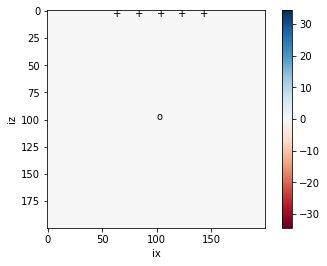

In [12]:
v = max([np.abs(source_fnc.min()), np.abs(source_fnc.max())])

image = plt.imshow(p_new, interpolation='nearest', animated=True, vmin=-v, vmax=+v, cmap=plt.cm.RdBu)

# Plot the receivers
for x, z in zip(receiver_x, receiver_z):
    plt.text(x, z, '+')

plt.text(source_x, source_z, 'o')
plt.colorbar()
plt.xlabel('ix')
plt.ylabel('iz')

plt.ion()
ir = np.arange(len(receiver_x))

print("CFL criterion epsilon = c*dt/dx :", c_max*dt/dx)               # CFL Criteria
plt.show()

## 2D Numerical solution

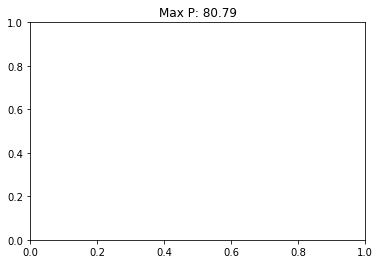

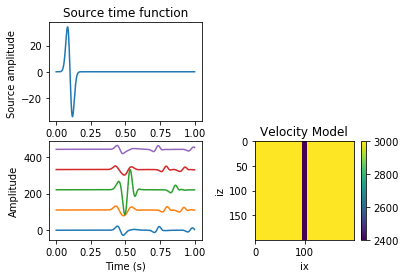

In [13]:
for it in range(t_n_points):
    for i in range(1, x_n_points - 1):
        d2p_z[:, i] = (p[:, i + 1] - 2 * p[:, i] + p[:, i - 1])/float(dx ** 2)      # 2nd derivative for P in Z
    for j in range(1, z_n_points - 1):
        d2p_x[j, :] = (p[j - 1, :] - 2 * p[j, :] + p[j + 1, :])/float(dx ** 2)      # 2nd derivative for P in X

    p_new = 2 * p - p_old + dt ** 2 * c ** 2 * (d2p_x + d2p_z)       # P at time n+1
    p_new[source_z, source_x] = p_new[source_z, source_x] + source_fnc[it]

    if it % f_snap == 0:  # you can change the speed of the plot by increasing the plotting interval

        plt.title("Max P: %.2f" % p.max())
        image.set_data(p_new)
        plt.gcf().canvas.draw()

    p_old, p = p, p_new

    # Save seismogram
    seis[ir, it] = p[receiver_z[ir], receiver_x[ir]]


# Plot the source time function and seismogram

plt.ioff()
plt.figure()

plt.subplot(221)
time = np.arange(t_n_points) * dt
plt.plot(time, source_fnc)
plt.title('Source time function')
plt.xlabel('Time (s) ')
plt.ylabel('Source amplitude ')

plt.subplot(223)
ymax = seis.ravel().max()
for ir in range(len(seis)):
    plt.plot(time, seis[ir, :] + ymax * ir)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

plt.subplot(224)
plt.title('Velocity Model')
plt.imshow(c)
plt.xlabel('ix')
plt.ylabel('iz')
plt.colorbar()

plt.show()  # Shows the source function